# Advanced Image Processing and Text Recognition with Spark OCR

In [0]:
from sparkocr.enums import *
from sparkocr.metrics import score
from sparkocr.transformers import *
from sparkocr.databricks import display_images
from sparkocr.metrics import score
from sparkocr.utils import to_pil_image
from pyspark.sql import functions as F
from pyspark.ml import Pipeline, PipelineModel
import matplotlib.pyplot as plt

spark.sql("set spark.sql.legacy.allowUntypedScalaUDF=true")

import logging
logger = spark._jvm.org.apache.log4j
logging.getLogger("py4j.java_gateway").setLevel(logging.ERROR)

11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0
11:22:49, INFO Received command c on object id p0

In [0]:
import pkg_resources
import shutil, os

ocr_examples = "/dbfs/FileStore/examples"
resources = pkg_resources.resource_filename('sparkocr', 'resources')
if not os.path.exists(ocr_examples):
    shutil.copytree(resources, ocr_examples)

# Pdf to Text

In [0]:
def pipeline():
    
    # Transforrm PDF document to images per page
    pdf_to_image = PdfToImage()\
          .setInputCol("content")\
          .setOutputCol("image")

    # Run OCR
    ocr = ImageToText()\
          .setInputCol("image")\
          .setOutputCol("text")\
          .setConfidenceThreshold(65)
    
    pipeline = PipelineModel(stages=[
        pdf_to_image,
        ocr
    ])
    
    return pipeline

In [0]:
pdf_example = '/FileStore/examples/ocr/pdfs/test_document.pdf'
pdf_example_df = spark.read.format("binaryFile").load(pdf_example).cache()

In [0]:
result = pipeline().transform(pdf_example_df).cache()

In [0]:
display(result.select("pagenum", "text", "confidence"))

pagenum text confidence 0 Patient Nam
Financial Numbe

Random Hospital Date of Birth

Patient Location

Chief Complaint
Shortness of breath

History of Present Illness

Patient is an 84-year-old male wilh a past medical history of hypertension, HFpEF last
known EF 55%, mild to moderate TA, pulmonary hypertension, permanent atrial
fibrillation on Eliquis, history of GI blesd, CK-M8, and anemia who presents with full weeks
oi ccneralized fatigue and fecling unwell. He also notes some shortness oi Breath and
worsening dyspnea willy minimal exerlion. His major complaints are shoulder and joint
pains. diffusely. He also complains of "bone pain’. He denics having any fevers or cnills.

e demes having any chest pain, palpitalicns, He denies any worse extremity
swelling than his baseline. He states he’s been compliant with his mcdications. Although
he stales he ran out of his Eliquis & few weeks ago. He denies having any blood in his
stools or mc!ena, although he does take iron pills and states his stools arc irequently black.
His hemoglobin Is al baseline.

Twelve-lead EKG showing atrial fibrillation, RBBB, LAFB, PVC. Chest x-ray showing new
small right creater than left pleural effusions with mild pulmonary vascular congestion. BNP
increased to 2800, up fram 1900. Tropoain 0.03. Renal function at baseline. Hemoaglopin
at baseline.

She normally takes 80 mq of oral Lasix daily. He was given 80 mg of IV Lasix in the ED.
He is currently net negative close to 1 L. He is still on 2 L nasal cannula.

' Ss 5
A 10 system roview af systems was completed and negative except as documented in HPI.

Physical Exam

Vitals & Measurements
T: 36.8 °C (Oral) TMIN: 36.8 "C (Oral) TMAX: 37.0 °C (Oral) HR: 54 RR: 7
BP: 140/63 WT: 100.3 KG
Pulse Ox: 100 % Oxygen: 2 L'min via Nasal Cannula
GENERAL: no acute distress
HEAD: normecephalic
EYES‘EARS‘NOSE/THAOAT: nupils are equal. normal oropharynx
NECK: normal inspection
RESPIRATORY: no respiratory distress, no rales on my exam
CARDIOVASCULAR: irregular. brady. no murmurs, rubs or galleps
ABDOMEN: soft, non-tendes
EXTREMITIES: Bilateral chronic venous stasis changes
NEUROLOGIC: alert and osieniec x 3. no gross motar or sensory deficils

AssessmenvPlan

Acute on chronic diastolic CHF (congestive heart failure)
Acute on chronic diastolic heart failure exacerbation. Small pleural effusions dilaterally

with mild pulmonary vascular congesiion on chest x-ray, slighi elevation in BNR. We'll
continue 1 more day af IV diuresis with 80 mg IV Lasix. He may have had a viral infection
which precipilated this. We'll add Tylenol jor his joint paias. Continue atenclol and
chiorthalidone.

AF - Atrial fibrillation
Permanent atrial fibrillation. Rates bradycardic in the &0s. Continue atenolol with hola

parameters. Coniinue Eliquis for stroke prevention. No evidence oj bleeding, hemog'abin
at baseline.

Printed: 7/17/2017 13:01 EDT Page 16 of 42

 
 

Arincitis

CHF - Congestive heart failure

Chronic kidney disease

Chronic venous insufficiency

Edema

GI bleeding

Glaucoma

Goul

Hypertension

Peptic ulcer

Peripheral ncuropathy

Peripheral vascular disease

Pulmonary hypertension

Tricuspid regurgitation
Historical

No qualifying data

Procedure/Surgical History

duodenal resection, duodenojcjunostomy.
small bowel enterolomy, removal of foreign
object and repair oi enterotomy (05/2 1/20 14),
colonoscopy (12/10/2013), egd (1209/2013),
H/O endoscopy (07/2013), H’O colonoscopy
(03/2013), pilonidal cyst removal at base of
spine (1981), laser eye surgery ior glaucoma.
lesions on small intestine closed up.

Home Medications
Home

allopurinol 300 mg oral tablet, 300 MG= 1
TAB, PO. Daily

atenolol 25 mg oral tablet, 25 MG= 1 TAB,
PO, Daily

chtorthalidone 25 mg oral tablet, 23 MG=
1 TAB, PO, MVE

Combigan 0.2%-0.5% ophthalmic
solution, 1 DROP, Both Eyes, Q12H

Eliquis 5 mg oral lablet, 5 MG= 1 TAB,
PO, BID

lerrous sulfate 925 mg (65 nig elemental
iron) oral tablet, 325 MG= 1 TAB, PO,

Daily
Lasix 80 mg oral tabic:. 80 MG= | TAB.


In [0]:
print("\n".join([row.text for row in result.select("text").collect()]))

Patient Nam
Financial Numbe

Random Hospital Date of Birth

Patient Location

Chief Complaint
Shortness of breath

History of Present Illness

Patient is an 84-year-old male wilh a past medical history of hypertension, HFpEF last
known EF 55%, mild to moderate TA, pulmonary hypertension, permanent atrial
fibrillation on Eliquis, history of GI blesd, CK-M8, and anemia who presents with full weeks
oi ccneralized fatigue and fecling unwell. He also notes some shortness oi Breath and
worsening dyspnea willy minimal exerlion. His major complaints are shoulder and joint
pains. diffusely. He also complains of "bone pain’. He denics having any fevers or cnills.

e demes having any chest pain, palpitalicns, He denies any worse extremity
swelling than his baseline. He states he’s been compliant with his mcdications. Although
he stales he ran out of his Eliquis & few weeks ago. He denies having any blood in his
stools or mc!ena, although he does take iron pills and states his stools arc irequently black.
His hemoglobin Is al baseline.

Twelve-lead EKG showing atrial fibrillation, RBBB, LAFB, PVC. Chest x-ray showing new
small right creater than left pleural effusions with mild pulmonary vascular congestion. BNP
increased to 2800, up fram 1900. Tropoain 0.03. Renal function at baseline. Hemoaglopin
at baseline.

She normally takes 80 mq of oral Lasix daily. He was given 80 mg of IV Lasix in the ED.
He is currently net negative close to 1 L. He is still on 2 L nasal cannula.

' Ss 5
A 10 system roview af systems was completed and negative except as documented in HPI.

Physical Exam

Vitals & Measurements
T: 36.8 °C (Oral) TMIN: 36.8 "C (Oral) TMAX: 37.0 °C (Oral) HR: 54 RR: 7
BP: 140/63 WT: 100.3 KG
Pulse Ox: 100 % Oxygen: 2 L'min via Nasal Cannula
GENERAL: no acute distress
HEAD: normecephalic
EYES‘EARS‘NOSE/THAOAT: nupils are equal. normal oropharynx
NECK: normal inspection
RESPIRATORY: no respiratory distress, no rales on my exam
CARDIOVASCULAR: irregular. brady. no murmurs, rubs or galleps
ABDOMEN: soft, non-tendes
EXTREMITIES: Bilateral chronic venous stasis changes
NEUROLOGIC: alert and osieniec x 3. no gross motar or sensory deficils

AssessmenvPlan

Acute on chronic diastolic CHF (congestive heart failure)
Acute on chronic diastolic heart failure exacerbation. Small pleural effusions dilaterally

with mild pulmonary vascular congesiion on chest x-ray, slighi elevation in BNR. We'll
continue 1 more day af IV diuresis with 80 mg IV Lasix. He may have had a viral infection
which precipilated this. We'll add Tylenol jor his joint paias. Continue atenclol and
chiorthalidone.

AF - Atrial fibrillation
Permanent atrial fibrillation. Rates bradycardic in the &0s. Continue atenolol with hola

parameters. Coniinue Eliquis for stroke prevention. No evidence oj bleeding, hemog'abin
at baseline.

Printed: 7/17/2017 13:01 EDT Page 16 of 42

 
 

Arincitis

CHF - Congestive heart failure

Chronic kidney disease

Chronic venous insufficiency

Edema

GI bleeding

Glaucoma

Goul

Hypertension

Peptic ulcer

Peripheral ncuropathy

Peripheral vascular disease

Pulmonary hypertension

Tricuspid regurgitation
Historical

No qualifying data

Procedure/Surgical History

duodenal resection, duodenojcjunostomy.
small bowel enterolomy, removal of foreign
object and repair oi enterotomy (05/2 1/20 14),
colonoscopy (12/10/2013), egd (1209/2013),
H/O endoscopy (07/2013), H’O colonoscopy
(03/2013), pilonidal cyst removal at base of
spine (1981), laser eye surgery ior glaucoma.
lesions on small intestine closed up.

Home Medications
Home

allopurinol 300 mg oral tablet, 300 MG= 1
TAB, PO. Daily

atenolol 25 mg oral tablet, 25 MG= 1 TAB,
PO, Daily

chtorthalidone 25 mg oral tablet, 23 MG=
1 TAB, PO, MVE

Combigan 0.2%-0.5% ophthalmic
solution, 1 DROP, Both Eyes, Q12H

Eliquis 5 mg oral lablet, 5 MG= 1 TAB,
PO, BID

lerrous sulfate 925 mg (65 nig elemental
iron) oral tablet, 325 MG= 1 TAB, PO,

Daily
Lasix 80 mg oral tabic:. 80 MG= | TAB.
PO, BID

omeprazole 20 mg 

##  With Skew Correction

In [0]:
def ocr_pipeline(skew_correction=False):
    
    # Transforrm PDF document to images per page
    pdf_to_image = PdfToImage()\
          .setInputCol("content")\
          .setOutputCol("image")

    # Image skew corrector 
    skew_corrector = ImageSkewCorrector()\
          .setInputCol("image")\
          .setOutputCol("corrected_image")\
          .setAutomaticSkewCorrection(skew_correction)

    # Run OCR
    ocr = ImageToText()\
          .setInputCol("corrected_image")\
          .setOutputCol("text")
    
    pipeline = PipelineModel(stages=[
        pdf_to_image,
        skew_corrector,
        ocr
    ])
    
    return pipeline

In [0]:
pdf_rotated_df = spark.read.format("binaryFile").load('/FileStore/examples/ocr/pdfs/rotated/400/400_rot.pdf').cache()

In [0]:
pdf_pipeline = ocr_pipeline(False) 

result = pdf_pipeline.transform(pdf_rotated_df).cache()
display(result)

path,modificationTime,length,image,total_pages,pagenum,documentnum,corrected_image,confidence,exception,text,positions
dbfs:/FileStore/examples/ocr/pdfs/rotated/400/400_rot.pdf,2020-04-01T08:59:25.000+0000,2240141,"List(dbfs:/FileStore/examples/ocr/pdfs/rotated/400/400_rot.pdf, 3507, 2480, 1, 10, 300, //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8= (truncated))",1,0,0,"List(dbfs:/FileStore/examples/ocr/pdfs/rotated/400/400_rot.pdf, 3507, 2480, 1, 10, 300, //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8= (truncated))",95.71951103210449,,"FOREWORD Electronic design engineers are the true idea men of the electronic industries. They create ideas and use them in their designs, they stimu- late ideas in other designers, and they borrow and adapt ideas from others. One could almost say they feed on and grow on ideas. useful, sometimes as parts of larger designs and sometimes as aids in measuring the parameters or testing the effectiveness of their designs. Many are quite simple “little” ideas, but experienced designers know that good little ideas make the good large design possible. To encourage this exchange of ideas, ELECTRONIC DESIGN has been sponsoring an IFD Award program. Readers are asked to vote on the ideas they find most useful in the IFD section of most votes in an issue, and from the issue winners a grand prize of $1,000 is awarded for the best “Idea of the Year.” For the past four years, we have been selecting 100 of the best ideas and making them available in an annual booklet, arranged by It is difficult to categorize ideas for designers; they are often useable in situations not originally considered by the user (or the cate- come comments and suggestions for arrangement of future volumes. To avoid the latter possibility, we suggest at least cursory perusal of all categories—you may be pleasantly surprised at what you find. February 1964 New York EDWARD E. GRAZDA Editorial Director ELECTRONIC DESIGN Vii","List(List(List(List(FOREWORD , 0, 1134.0, 164.0, 332.0, 50.0, 13), List(Electronic design engineers are the true idea men of the electronic industries. They create ideas and use them in their designs, they stimu- late ideas in other designers, and they borrow and adapt ideas from others. One could almost say they feed on and grow on ideas. , 0, 525.0, 339.0, 1523.0, 271.0, 12), List(useful, sometimes as parts of larger designs and sometimes as aids in measuring the parameters or testing the effectiveness of their designs. Many are quite simple “little” ideas, but experienced designers know , 0, 504.0, 988.0, 1516.0, 220.0, 11), List(that good little ideas make the good large design possible. , 0, 501.0, 1165.0, 1266.0, 96.0, 13), List(To encourage this exchange of ideas, ELECTRONIC DESIGN has been sponsoring an IFD Award program. Readers are asked to vote on the ideas they find most useful in the IFD section of , 0, 492.0, 1283.0, 1515.0, 209.0, 13), List(most votes in an issue, and from the issue winners a grand prize of $1,000 is awarded for the best “Idea of the Year.” , 0, 485.0, 1525.0, 1515.0, 139.0, 13), List(For the past four years, we have been selecting 100 of the best ideas and making them available in an annual booklet, arranged by , 0, 479.0, 1690.0, 1514.0, 165.0, 13), List(It is difficult to categorize ideas for designers; they are often useable in situations not originally considered by the user (or the cate- , 0, 459.0, 2158.0, 1516.0, 154.0, 13), List(come comments and suggestions for arrangement of future volumes. To avoid the latter possibility, we suggest at least cursory perusal of all categories—you may be pleasantly surprised at what you find. , 0, 446.0, 2463.0, 1519.0, 210.0, 13), List(February 1964 New York EDWARD E. GRAZDA , 0, 442.0, 2679.0, 150

In [0]:
display_images(result)

Origin: dbfs:/FileStore/examples/ocr/pdfs/rotated/400/400_rot.pdf 
 Resolution: 300 dpi 
 Width: 2480 px 
 Height: 3507 px 
 Mode: Greyscale 
 Number of channels: 1

## Display recognized text without skew correction

In [0]:
display(result.select("pagenum","text", "confidence"))

pagenum,text,confidence
0,"FOREWORD Electronic design engineers are the true idea men of the electronic industries. They create ideas and use them in their designs, they stimu- late ideas in other designers, and they borrow and adapt ideas from others. One could almost say they feed on and grow on ideas. useful, sometimes as parts of larger designs and sometimes as aids in measuring the parameters or testing the effectiveness of their designs. Many are quite simple “little” ideas, but experienced designers know that good little ideas make the good large design possible. To encourage this exchange of ideas, ELECTRONIC DESIGN has been sponsoring an IFD Award program. Readers are asked to vote on the ideas they find most useful in the IFD section of most votes in an issue, and from the issue winners a grand prize of $1,000 is awarded for the best “Idea of the Year.” For the past four years, we have been selecting 100 of the best ideas and making them available in an annual booklet, arranged by It is difficult to categorize ideas for designers; they are often useable in situations not originally considered by the user (or the cate- come comments and suggestions for arrangement of future volumes. To avoid the latter possibility, we suggest at least cursory perusal of all categories—you may be pleasantly surprised at what you find. February 1964 New York EDWARD E. GRAZDA Editorial Director ELECTRONIC DESIGN Vii",95.71951103210449


## Display results with skew correction

In [0]:
pdf_pipeline = ocr_pipeline(True) 

corrected_result = pdf_pipeline.transform(pdf_rotated_df).cache()


In [0]:
display(corrected_result.select("pagenum", "text", "confidence"))

pagenum,text,confidence
0,"FOREWORD Electronic design engineers are the true idea men of the electronic industries. They create ideas and use them in their designs, they stimu- late ideas in other designers, and they borrow and adapt ideas from others. One could almost say they feed on and grow on ideas. ELECTRONIC DESIGN has recognized this need and its edi- torial content has reflected this awareness. Each issue is literally a col- lection of useful ideas. In one section, however, special attention has been devoted to providing a forum for the exchange of ideas between readers—a section called “Ideas For Design.” Here are presented clever, unique, ingenious, and often very simple ideas that readers have found useful, sometimes as parts of larger designs and sometimes as aids in measuring the parameters or testing the effectiveness of their designs. Many are quite simple “little” ideas, but experienced designers know that good little ideas make the good large design possible. To encourage this exchange of ideas, ELECTRONIC DESIGN has been sponsoring an IFD Award program. Readers are asked to vote on the ideas they find most useful in the IFD section of ELECTRONIC DESIGN. Awards are made to the idea getting the most votes in an issue, and from the issue winners a grand prize of $1,000 is awarded for the best “Idea of the Year.” For the past four years, we have been selecting 100 of the best ideas and making them available in an annual booklet, arranged by category for the convenience of readers. Four volumes have appeared in this series, and now, in response to many requests we have com- bined these four volumes into a convenient, more durable book. The ideas have been rearranged under specific categories, making for a very handy reference book, suitable for a desk or library shelf. It is difficult to categorize ideas for designers; they are often useable in situations not originally considered by the user (or the cate- gorizer ). Therefore, the reader may not agree with our choice, or worse still, he may miss a good idea because it did not appear under the cate- gory to which he felt it belonged. If the former be the case, we wel- come comments and suggestions for arrangement of future volumes. To avoid the latter possibility, we suggest at least cursory perusal of all categories—you may be pleasantly surprised at what you find. February 1964 New York EDWARD E. GRAZDA Editorial Director ELECTRONIC DESIGN vii",95.61764068603516


## Display skew corrected images

In [0]:
display_images(corrected_result, field='corrected_image')

Origin: dbfs:/FileStore/examples/ocr/pdfs/rotated/400/400_rot.pdf 
 Resolution: 300 dpi 
 Width: 2600 px 
 Height: 3591 px 
 Mode: Greyscale 
 Number of channels: 1

## Compute score and compare
Read original text and calculate scores for both results.

In [0]:
detected = "\n".join([row.text for row in result.collect()])
corrected_detected = "\n".join([row.text for row in corrected_result.collect()])

# read original text
pdf_rotated_text = open('/dbfs/FileStore/examples/ocr/pdfs/rotated/400.txt', "r").read()

# compute scores
detected_score = score(pdf_rotated_text, detected)
corrected_score = score(pdf_rotated_text, corrected_detected)

#  print scores
print("Score without skew correction: {0}".format(detected_score))
print("Score with skew correction: {0}".format(corrected_score))

Score without skew correction: 0.7278876170655567
Score with skew correction: 0.995067817509248

# Preprocess image with nosed background

In [0]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-ocr-workshop/master/jupyter/data/images/text_with_noise.png
dbutils.fs.cp("file:/databricks/driver/text_with_noise.png", "dbfs:/")

Out[17]: True

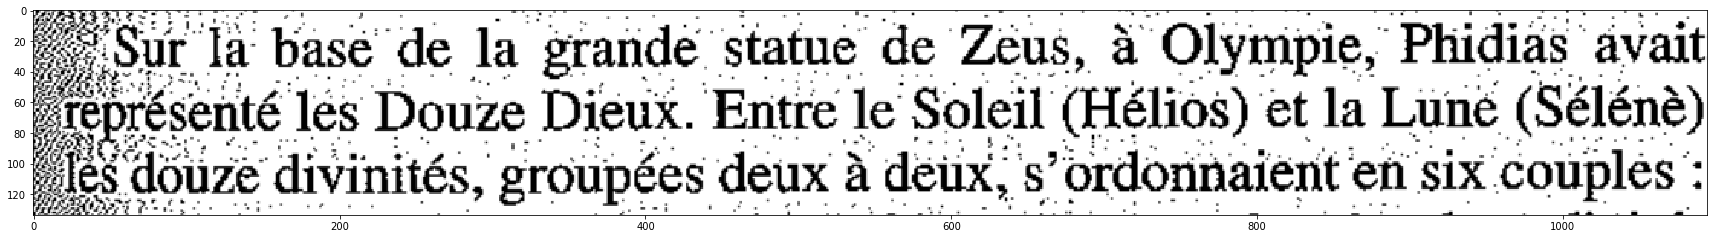

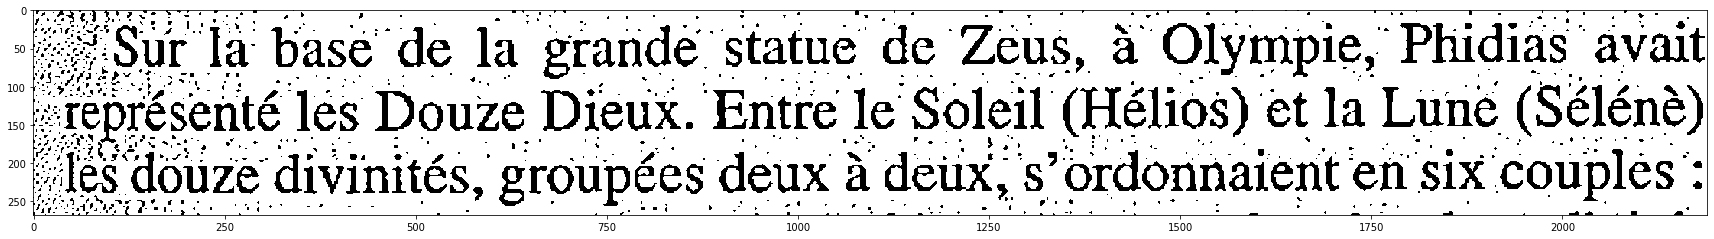

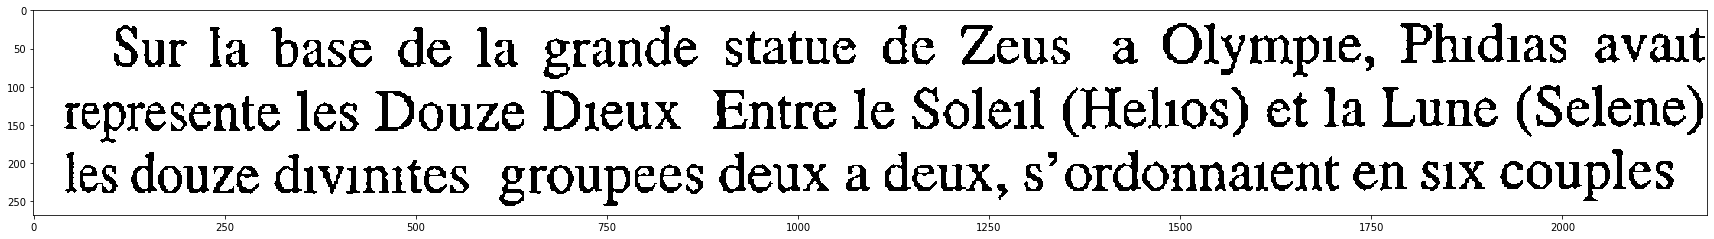

In [0]:
image_df = spark.read.format("binaryFile").load('/text_with_noise.png').cache()

# Read binary as image
binary_to_image = BinaryToImage()
binary_to_image.setInputCol("content")
binary_to_image.setOutputCol("image")

# Scale image
scaler = ImageScaler()
scaler.setInputCol("image")
scaler.setOutputCol("scaled_image")
scaler.setScaleFactor(2.0)

# Binarize using adaptive tresholding
binarizer = ImageAdaptiveThresholding()
binarizer.setInputCol("scaled_image")
binarizer.setOutputCol("binarized_image")
binarizer.setBlockSize(71)
binarizer.setOffset(65)

remove_objects = ImageRemoveObjects()
remove_objects.setInputCol("binarized_image")
remove_objects.setOutputCol("cleared_image")
remove_objects.setMinSizeObject(150)
remove_objects.setMaxSizeObject(4000)

# Run OCR
ocr = ImageToText()
ocr.setInputCol("cleared_image")
ocr.setOutputCol("text")
ocr.setConfidenceThreshold(50)
ocr.setIgnoreResolution(False)

# OCR pipeline
noisy_pipeline = PipelineModel(stages=[
    binary_to_image,
    scaler,
    binarizer,
    remove_objects,
    ocr
])


result = noisy_pipeline \
.transform(image_df) \
.cache()


for r in result.distinct().collect():
  
    print("Original: %s" % r.path)
    img = r.image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(30,20))
    plt.imshow(img_pil, cmap='gray')
    
    print("Binarized")
    img = r.binarized_image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(30,20))
    plt.imshow(img_pil, cmap='gray')
  
    print("Removing objects")
    img = r.cleared_image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(30,20))
    plt.imshow(img_pil, cmap='gray')
    
    
    plt.show()

In [0]:
print("\n".join([row.text for row in result.select("text").collect()]))

Sur la base de la grande statue de Zeus a Olympie, Phidias avait
represente les Douze Dieux Entre le Soleil (Helios) et la Lune (Selene)
les douze divinites groupees deux a deux, s’ordonnaient en s1x couples

## Text from natural Scene

In [0]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/ocr/natural_scene.jpeg
dbutils.fs.cp("file:/databricks/driver/natural_scene.jpeg", "dbfs:/")

Out[20]: True

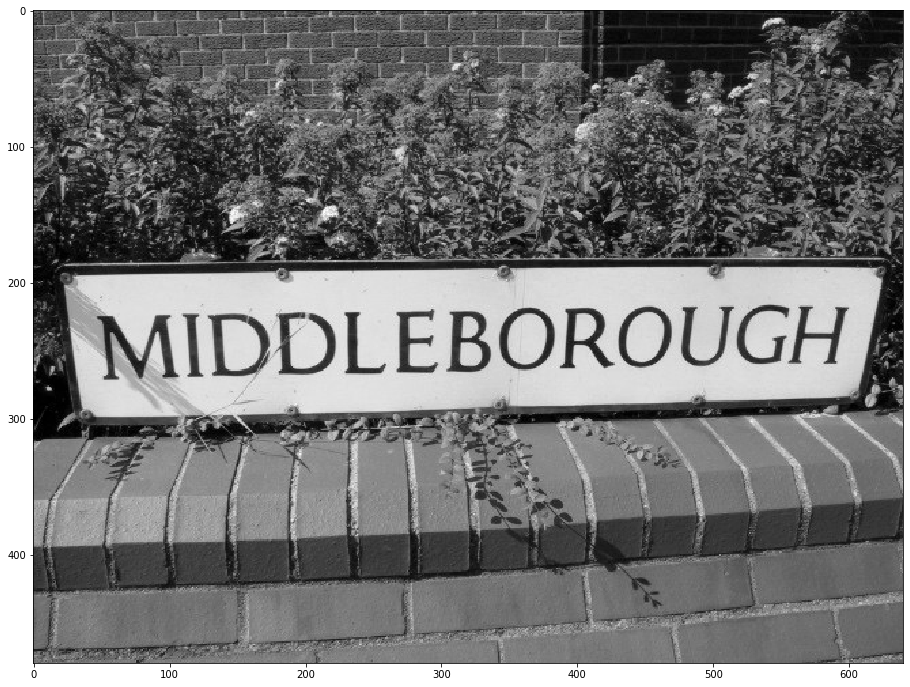

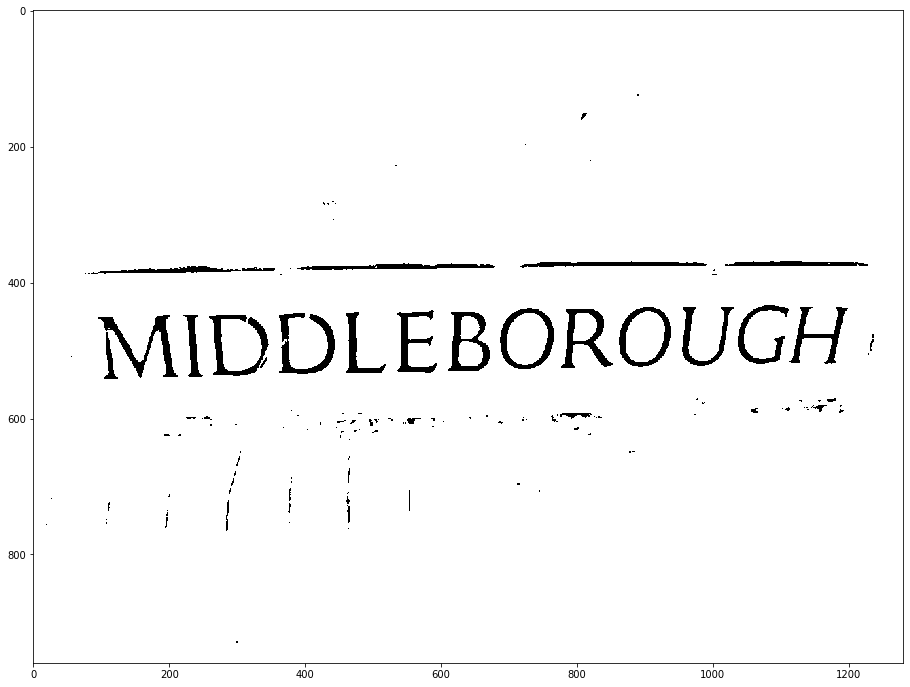

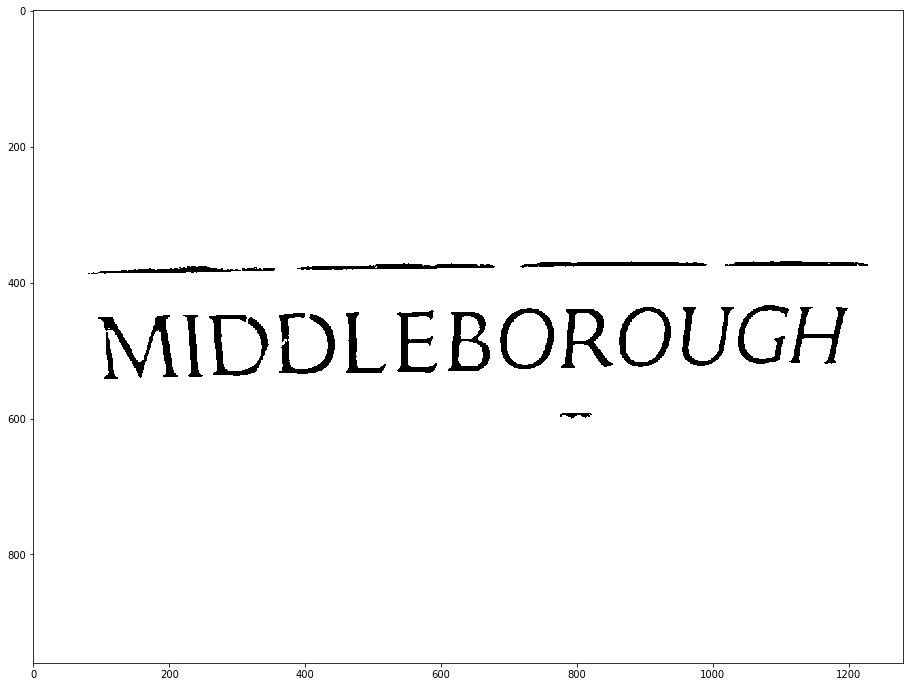

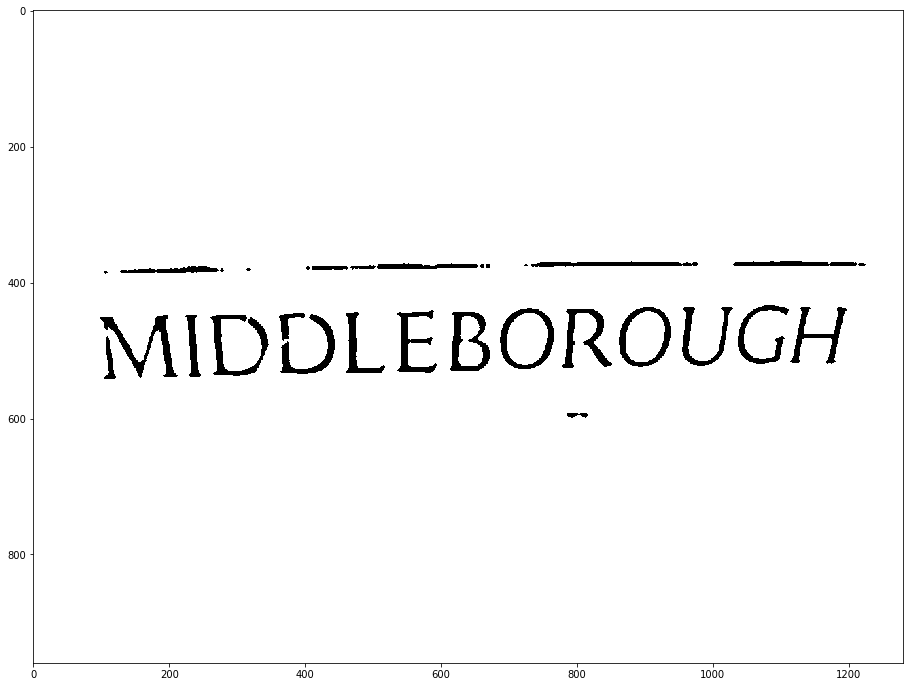

In [0]:
image_df = spark.read.format("binaryFile").load('/natural_scene.jpeg').cache()

# Apply morphology opening
morpholy_operation = ImageMorphologyOperation()
morpholy_operation.setKernelShape(KernelShape.DISK)
morpholy_operation.setKernelSize(2)
morpholy_operation.setOperation("closing")
morpholy_operation.setInputCol("cleared_image")
morpholy_operation.setOutputCol("corrected_image")

# Run OCR
ocr = ImageToText()
ocr.setInputCol("corrected_image")
ocr.setOutputCol("text")
ocr.setConfidenceThreshold(50)
ocr.setIgnoreResolution(False)

# OCR pipeline
scene_pipeline = PipelineModel(stages=[
    binary_to_image,
    scaler,
    binarizer,
    remove_objects,
    morpholy_operation,
    ocr
])

result = scene_pipeline \
.transform(image_df) \
.cache()


for r in result.distinct().collect():
      
    print("Original: %s" % r.path)
    img = r.image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(20,12))
    plt.imshow(img_pil, cmap='gray')
    
    print("Binarized")
    img = r.binarized_image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(20,12))
    plt.imshow(img_pil, cmap='gray')
  
    print("Removing objects")
    img = r.cleared_image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(20,12))
    plt.imshow(img_pil, cmap='gray')
    
    print("Morphology closing")
    img = r.corrected_image
    img_pil = to_pil_image(img, img.mode)

    plt.figure(figsize=(20,12))
    plt.imshow(img_pil, cmap='gray')
    
    
    plt.show()

In [0]:
print("\n".join([row.text for row in result.select("text").collect()]))

MIDDLEBOROUGH

## More example here

https://github.com/JohnSnowLabs/spark-ocr-workshop